In [1]:
#Problem statement:Create a classification model to predict whether price range ofmobile based on certain specifications
#Details of features:
#The columns are described as follows:
"Dataset as 21 features and 2000 entries. The meanings of the features are given below."
"•battery_power: Total energy a battery can store in one time measured in mAh"
"•blue: Has bluetooth or not"
"•clock_speed: speed at which microprocessor executes instructions"
"•dual_sim: Has dual sim support or not"
"•fc: Front Camera mega pixels"
"•four_g: Has 4G or not"
"•int_memory: Internal Memory in Gigabytes"
#Steps to consider:
"1)Remove handle null values (if any)."
"2)Split data into training and test data."
"3)Apply the following models on the training dataset and generate the predicted value for the test dataset"
"a) Logistic Regression"
"b) KNN Classification"
"c) SVM Classifier with linear and rbf kernel"
"4)Predict the price range for test data"
"5)Compute Confusion matrix and classification report for each of these models."
"6)Report the model with the best accuracy."


'6)Report the model with the best accuracy.'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('mobile_price_range_data.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
df.sum()

battery_power    2477037.0
blue                 990.0
clock_speed         3044.5
dual_sim            1019.0
fc                  8619.0
four_g              1043.0
int_memory         64093.0
m_dep               1003.5
mobile_wt         280498.0
n_cores             9041.0
pc                 19833.0
px_height        1290216.0
px_width         2503031.0
ram              4248426.0
sc_h               24613.0
sc_w               11534.0
talk_time          22022.0
three_g             1523.0
touch_screen        1006.0
wifi                1014.0
price_range         3000.0
dtype: float64

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
df.isnull().sum().sum()#this represents there are no null values

0

In [11]:
df.mean()

battery_power    1238.51850
blue                0.49500
clock_speed         1.52225
dual_sim            0.50950
fc                  4.30950
four_g              0.52150
int_memory         32.04650
m_dep               0.50175
mobile_wt         140.24900
n_cores             4.52050
pc                  9.91650
px_height         645.10800
px_width         1251.51550
ram              2124.21300
sc_h               12.30650
sc_w                5.76700
talk_time          11.01100
three_g             0.76150
touch_screen        0.50300
wifi                0.50700
price_range         1.50000
dtype: float64

In [15]:
df.shape

(2000, 21)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [17]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

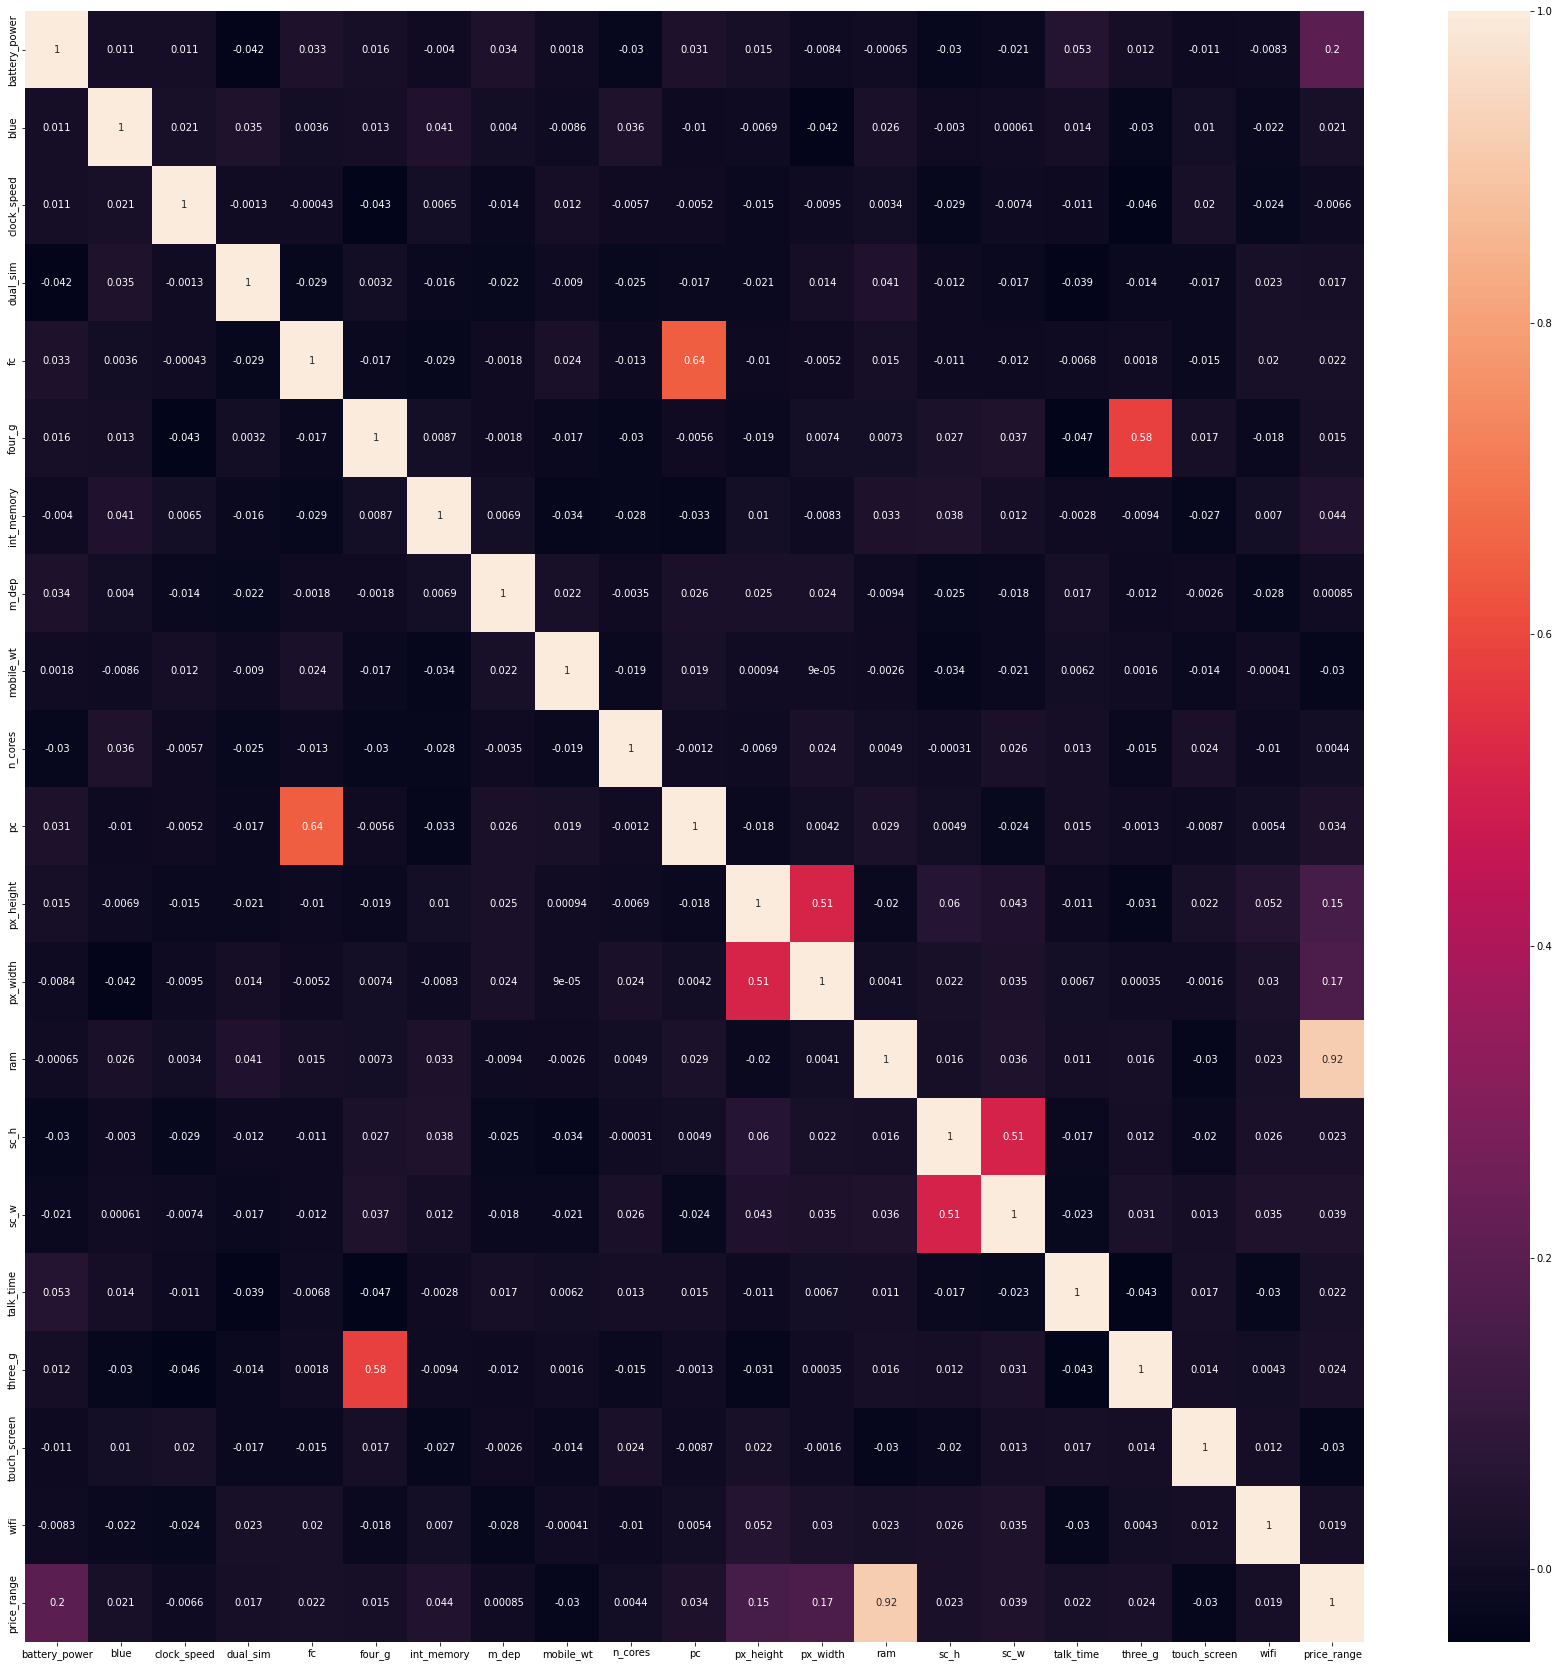

In [23]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True,linecolor='yellow',mask=False)

In [24]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [25]:
df['ram'].value_counts()

1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: ram, Length: 1562, dtype: int64

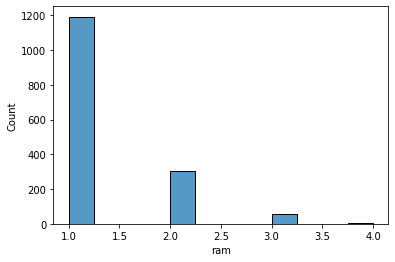

In [26]:
sns.histplot(x=df['ram'].value_counts())

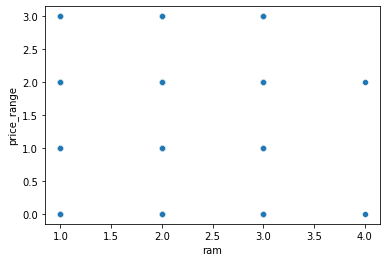

In [27]:
sns.scatterplot(x=df['ram'].value_counts(),y=df['price_range'])

In [28]:
df['px_height'].value_counts().head(10)

347    7
179    6
371    6
275    6
674    5
286    5
42     5
211    5
649    5
398    5
Name: px_height, dtype: int64

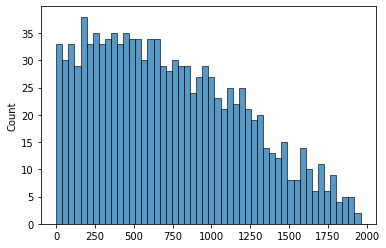

In [33]:
sns.histplot(df['px_height'].value_counts().keys(), bins=50)

In [34]:
df['px_width'].value_counts()

874     7
1247    7
1383    6
1463    6
1469    6
       ..
1125    1
1367    1
1569    1
1481    1
1632    1
Name: px_width, Length: 1109, dtype: int64

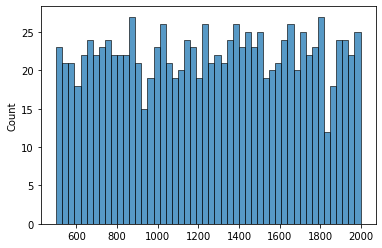

In [35]:
sns.histplot(df['px_width'].value_counts().keys(), bins=50)

In [36]:
df['battery_power'].value_counts()

1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64

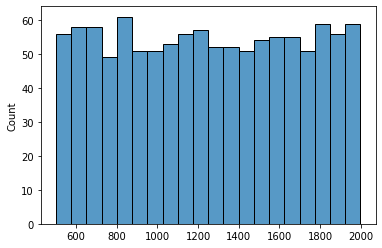

In [37]:
sns.histplot(df['battery_power'].value_counts().keys(), bins=20)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


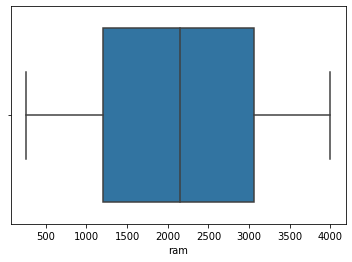

In [38]:
sns.boxplot(df['ram'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


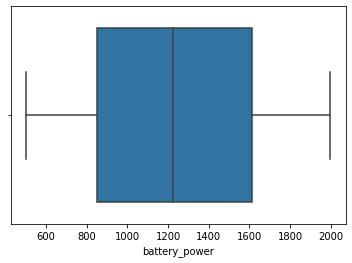

In [39]:
sns.boxplot(df['battery_power'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


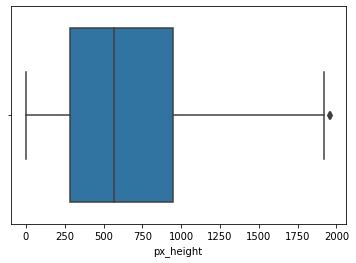

In [40]:
sns.boxplot(df['px_height'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


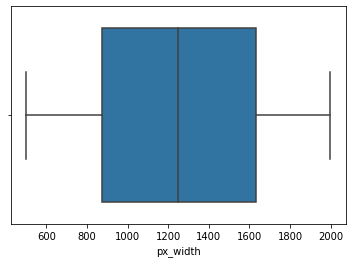

In [41]:
sns.boxplot(df['px_width'])

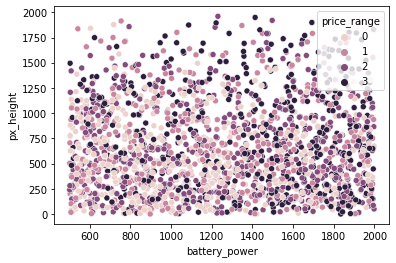

In [42]:
sns.scatterplot(x=df['battery_power'],y=df['px_height'],hue=df['price_range'])

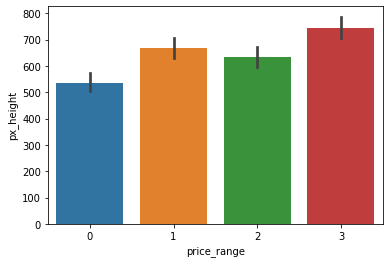

In [43]:
sns.barplot(x=df['price_range'], y = df['px_height'])

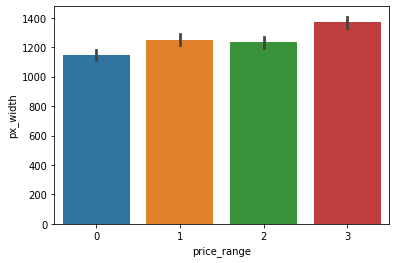

In [44]:
sns.barplot(x=df['price_range'], y = df['px_width'])

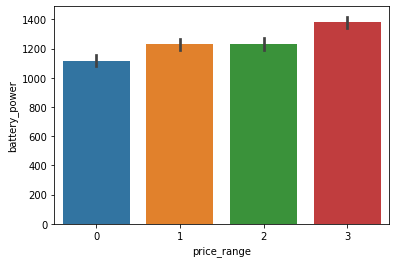

In [45]:
sns.barplot(x=df['price_range'], y = df['battery_power'])

In [46]:
df.groupby(["price_range"]).count()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
1,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
2,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
3,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500


In [47]:
#removing the outliers
df1 = df.drop([1960], axis=0)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [48]:
print(df.shape)
print(df1.shape)

(2000, 21)
(1999, 21)


In [49]:
x = df1[['battery_power','px_height','px_width','ram']]
y = df1['price_range']

In [50]:
x

,battery_power,px_height,px_width,ram
0,842,20,756,2549
1,1021,905,1988,2631
2,563,1263,1716,2603
3,615,1216,1786,2769
4,1821,1208,1212,1411
...,...,...,...,...
1995,794,1222,1890,668
1996,1965,915,1965,2032
1997,1911,868,1632,3057
1998,1512,336,670,869


In [51]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 1999, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1499, 4)
(500, 4)
(1499,)
(500,)


In [56]:
#1]using logistic regression model
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()
m1.fit(x_train,y_train)
y_pred = m1.predict(x_test)
print("Training Score:",m1.score(x_train,y_train))
print("Testing Score:",m1.score(x_test,y_test))

Training Score: 0.9613075383589059
Testing Score: 0.962


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))# y_test goes into the rows and y_pred goes into columns
print("Classification_report: ")
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[128   3   0   0]
 [  2 123   0   0]
 [  0   5 113   3]
 [  0   0   6 117]]
Classification_report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       131
           1       0.94      0.98      0.96       125
           2       0.95      0.93      0.94       121
           3       0.97      0.95      0.96       123

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [64]:
test1 = pd.DataFrame()
test1['price_org'] = y_test
test1['logistic_pred'] = y_pred
test1

,price_org,logistic_pred
630,0,0
1608,1,1
1654,0,0
670,2,2
583,0,0
...,...,...
854,2,2
151,3,3
489,2,1
1121,3,3


In [68]:
#knn classification
from sklearn.neighbors import KNeighborsClassifier
m2 = KNeighborsClassifier(n_neighbors=21)
m2.fit(x_train,y_train)
y_predkn = m1.predict(x_test)
print("Training Score : ",m1.score(x_train,y_train)) 
print("Testing Score : ",m1.score(x_test,y_test)) 

Training Score :  0.9613075383589059
Testing Score :  0.962


In [71]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_predkn))
print("Classification_report: ")
print(classification_report(y_test,y_predkn))

Confusion Matrix:
[[128   3   0   0]
 [  2 123   0   0]
 [  0   5 113   3]
 [  0   0   6 117]]
Classification_report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       131
           1       0.94      0.98      0.96       125
           2       0.95      0.93      0.94       121
           3       0.97      0.95      0.96       123

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [72]:
test1['kn_pred'] = y_predkn
test1

,price_org,logistic_pred,kn_pred
630,0,0,0
1608,1,1,1
1654,0,0,0
670,2,2,2
583,0,0,0
...,...,...,...
854,2,2,2
151,3,3,3
489,2,1,1
1121,3,3,3


In [76]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=1)
svm.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [78]:
y_predsvm = svm.predict(x_test)
print("Training Score : ",svm.score(x_train,y_train)) 
print("Testing Score : ",svm.score(x_test,y_test)) 


Training Score :  0.9653102068045364
Testing Score :  0.956


In [79]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_predsvm))
print("Classification_report: ")
print(classification_report(y_test,y_predsvm))

Confusion Matrix:
[[129   2   0   0]
 [  4 121   0   0]
 [  0   7 112   2]
 [  0   0   7 116]]
Classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       131
           1       0.93      0.97      0.95       125
           2       0.94      0.93      0.93       121
           3       0.98      0.94      0.96       123

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [80]:
test1['svm_pred'] = y_predsvm

In [83]:
#kernel=RBF kernel
svm1 = SVC(kernel='rbf',gamma=0.00001,C=10)
svm1.fit(x_train,y_train)

SVC(C=10, gamma=1e-05)

In [85]:
y_predrbf = svm1.predict(x_test)
print("Training Score : ",svm1.score(x_train,y_train)) 
print("Testing Score : ",svm1.score(x_test,y_test)) 

Training Score :  0.9986657771847899
Testing Score :  0.918


In [86]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_predrbf))
print("Classification_report: ")
print(classification_report(y_test,y_predrbf))

Confusion Matrix:
[[124   7   0   0]
 [  4 114   7   0]
 [  0   6 109   6]
 [  0   0  11 112]]
Classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       131
           1       0.90      0.91      0.90       125
           2       0.86      0.90      0.88       121
           3       0.95      0.91      0.93       123

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [87]:
test1['rbf_pred'] = y_predrbf

In [88]:
test1.head(20)

,price_org,logistic_pred,kn_pred,svm_pred,rbf_pred
630,0,0,0,0,1
1608,1,1,1,1,1
1654,0,0,0,0,0
670,2,2,2,2,2
583,0,0,0,0,0
614,2,2,2,2,2
1578,2,2,2,2,2
1809,1,1,1,1,1
1157,0,0,0,0,0
1750,0,0,0,0,0


In [ ]:
#Conclusion:
#Logistic Regression Score(in percentage): 96.1%
#KNN Score(in percentage): 96.1%
#SVM Score(linear)(in percentage): 96.5%
#SVM Score(RBF)(in percentage): 99.8%
#4) SVM is the most accurate model among the classification models I have used in this project with the accuracyscore of 99.8%